# Principal Component Analysis with Cancer Data

In [61]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [62]:
cnames=('id_number','Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class')

In [128]:
df=pd.read_csv("breast-cancer-wisconsin.csv",names=cnames)

In [64]:
df.head(10)

,id_number,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [65]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [66]:
df.dtypes

id_number                int64
Clump_Thicknes           int64
Cell_Size                int64
Cell_Shape               int64
Marginal_Adhesion        int64
Epithelial_Cell_Size     int64
Bare_Nuclei             object
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
Class                    int64
dtype: object

In [67]:
#df.Bare_Nuclei=df.Bare_Nuclei.astype(int)
df2 = df.apply(pd.to_numeric, errors='coerce')

In [68]:
df2.shape

(699, 11)

In [69]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
id_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thicknes,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [70]:
# We could see "?" values in column, this should be removed from data set
#df2[~df2.applymap(np.isreal).all(1)]
# Check for missing value in any other column

In [71]:
mis_value_all=pd.isna(df2).sum()

In [72]:
mis_value_all

id_number                0
Clump_Thicknes           0
Cell_Size                0
Cell_Shape               0
Marginal_Adhesion        0
Epithelial_Cell_Size     0
Bare_Nuclei             16
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

In [73]:
df2 = df2.fillna(df2.median())

In [74]:
count1=df2[df.duplicated(keep='first')].shape[0]

In [75]:
count1

8

In [76]:
df2.drop_duplicates(keep = 'first', inplace = True)

In [77]:
df2.dtypes

id_number                 int64
Clump_Thicknes            int64
Cell_Size                 int64
Cell_Shape                int64
Marginal_Adhesion         int64
Epithelial_Cell_Size      int64
Bare_Nuclei             float64
Bland_Chromatin           int64
Normal_Nucleoli           int64
Mitoses                   int64
Class                     int64
dtype: object

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
id_number               690 non-null int64
Clump_Thicknes          690 non-null int64
Cell_Size               690 non-null int64
Cell_Shape              690 non-null int64
Marginal_Adhesion       690 non-null int64
Epithelial_Cell_Size    690 non-null int64
Bare_Nuclei             690 non-null float64
Bland_Chromatin         690 non-null int64
Normal_Nucleoli         690 non-null int64
Mitoses                 690 non-null int64
Class                   690 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.7 KB


In [79]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df2[df2['Bare_Nuclei']=='?'].count()

C:\Users\Prasanna\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


id_number               0
Clump_Thicknes          0
Cell_Size               0
Cell_Shape              0
Marginal_Adhesion       0
Epithelial_Cell_Size    0
Bare_Nuclei             0
Bland_Chromatin         0
Normal_Nucleoli         0
Mitoses                 0
Class                   0
dtype: int64

In [80]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [81]:
# Check for correlation of variable
df2.corr()

,id_number,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id_number,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
Clump_Thicknes,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell_Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell_Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal_Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Epithelial_Cell_Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare_Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Bland_Chromatin,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Normal_Nucleoli,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [82]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [83]:

df2.groupby(["Class"]).count()

,id_number,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
2,452,452,452,452,452,452,452,452,452,452
4,238,238,238,238,238,238,238,238,238,238


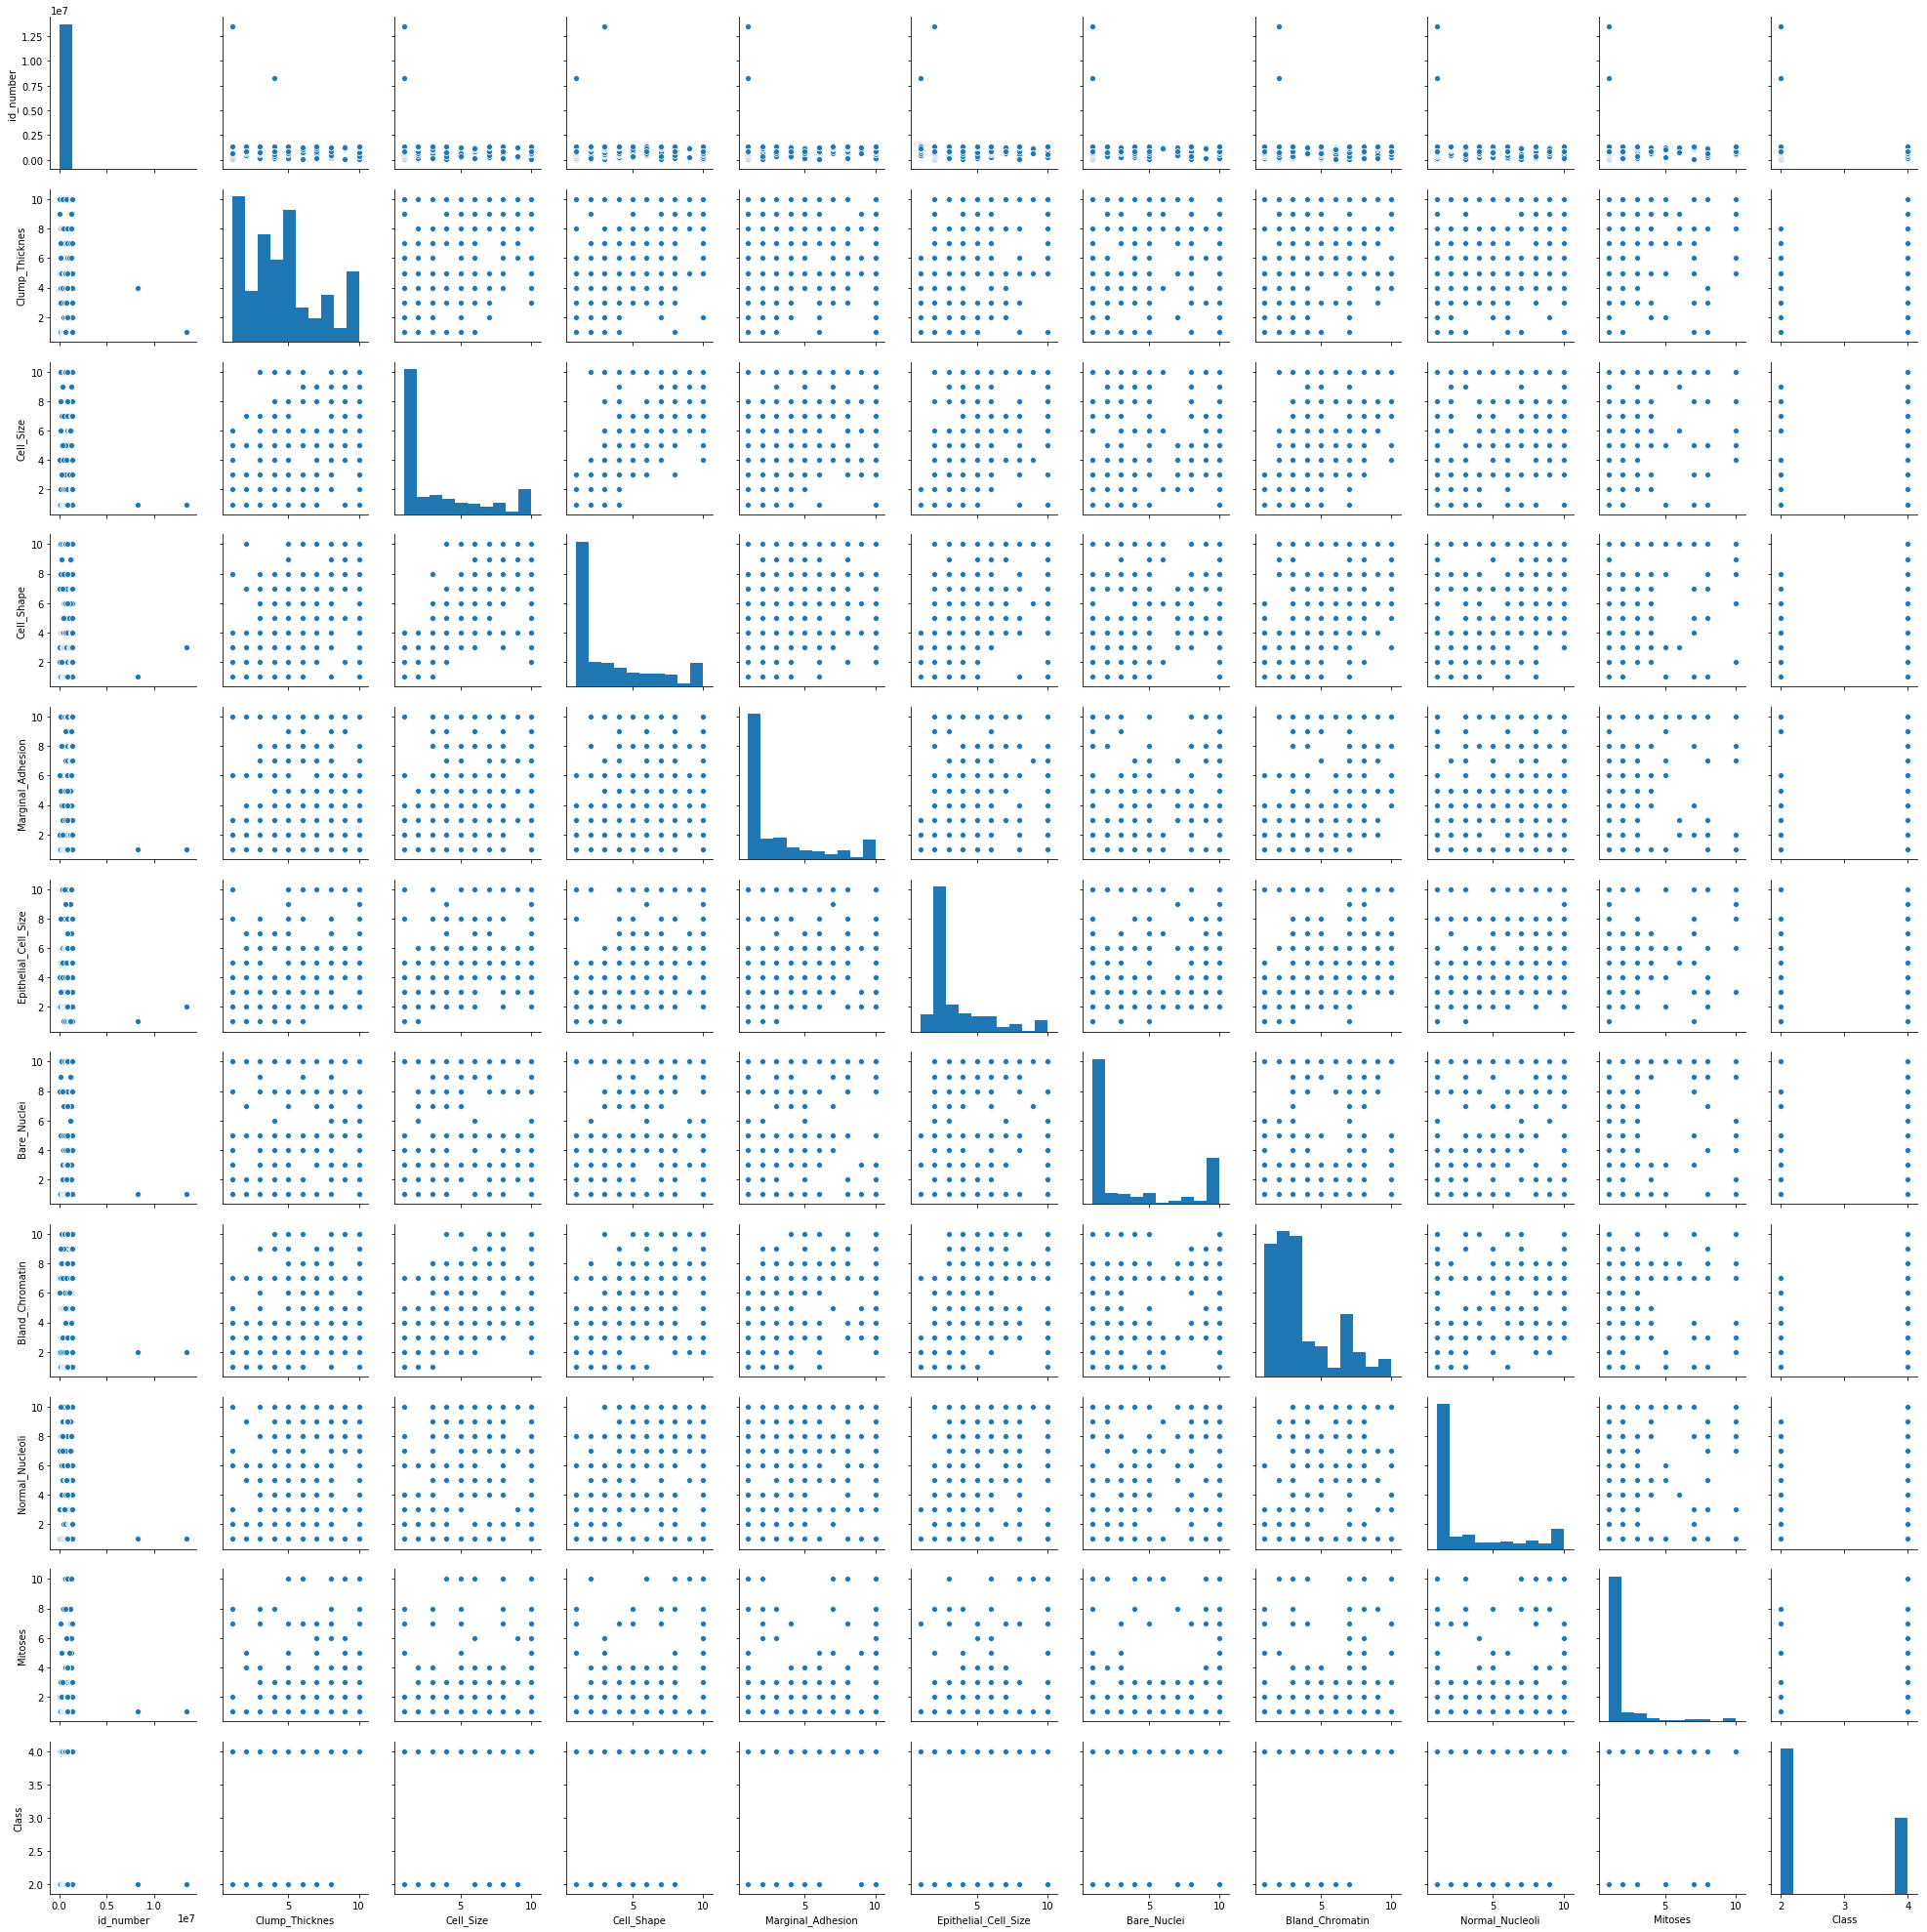

In [84]:
sns.pairplot(df2)

In [85]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

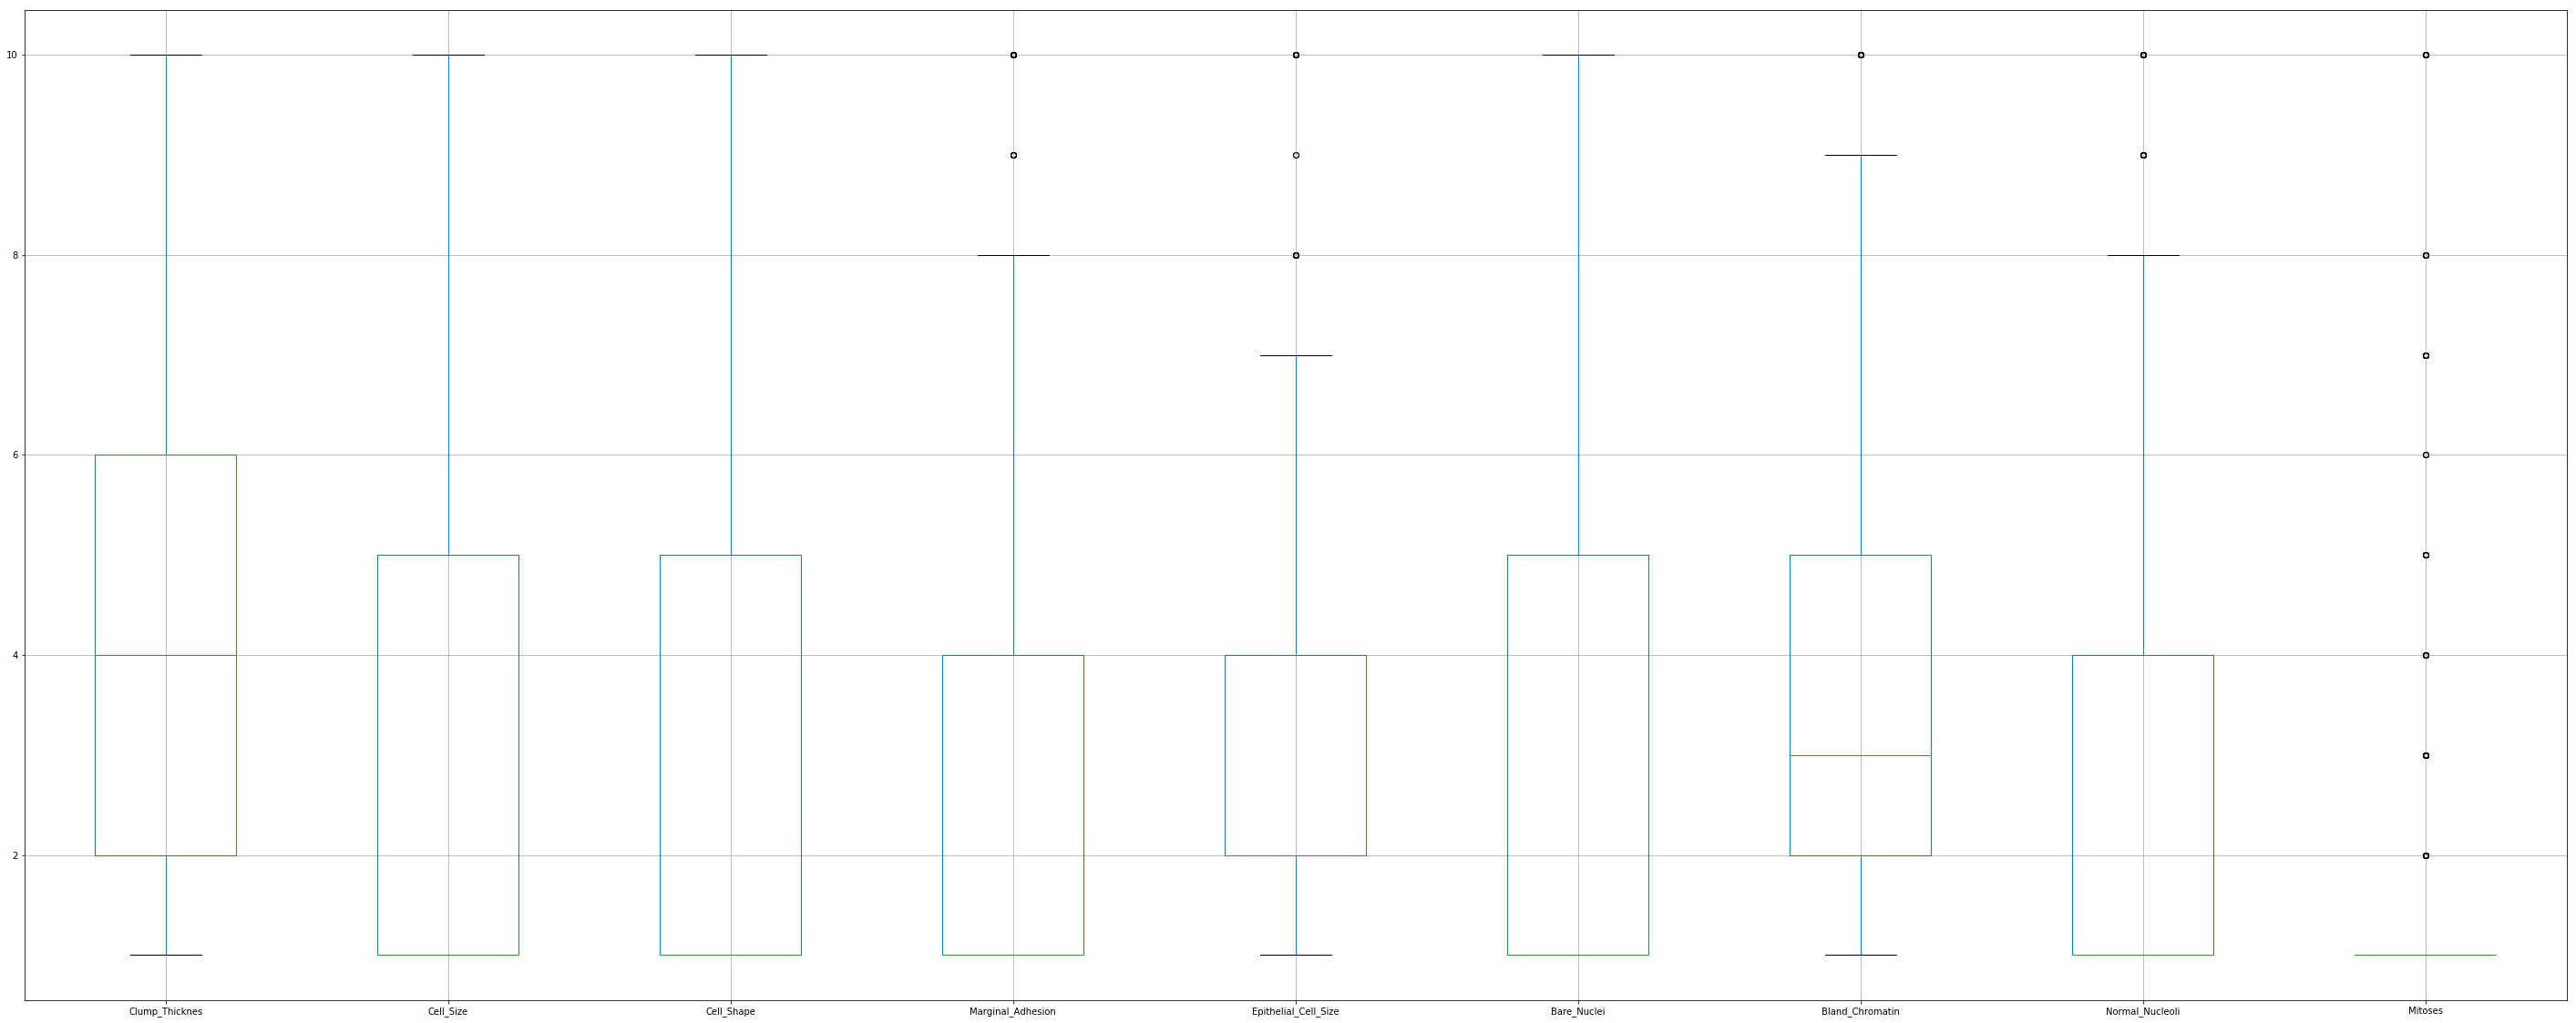

In [86]:
boxplot=df2.boxplot(column=['Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'],figsize=(50,20))

In [87]:
# By above boxplot anyalysis , we can observe that Mitoses, Marginal_Adhesion,Epithelial Cell size,
#bland_cormation, Normal_Nucliel
# Out of which we can see that 

In [28]:
pd.crosstab(df2['Mitoses'],df2['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [29]:
#df_filtered = df2[df2['Mitoses'] <= 1] 

In [30]:
df2['Normal_Nucleoli']=np.where(df2['Normal_Nucleoli']>=8, 8, df2['Normal_Nucleoli'])


In [88]:
pd.crosstab(df2['Epithelial_Cell_Size'],df2['Class'])

Class,2,4
Epithelial_Cell_Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [89]:
df2['Epithelial_Cell_Size']=np.where(df2['Epithelial_Cell_Size']>=5, 5, df2['Epithelial_Cell_Size'])

In [90]:
pd.crosstab(df2['Marginal_Adhesion'],df2['Class'])

Class,2,4
Marginal_Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [91]:
df2['Marginal_Adhesion']=np.where(df2['Marginal_Adhesion']>=8, 8, df2['Marginal_Adhesion'])

In [92]:
pd.crosstab(df2['Bland_Chromatin'],df2['Class'])

Class,2,4
Bland_Chromatin,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [93]:
df2['Bland_Chromatin']=np.where(df2['Bland_Chromatin']>=4, 4, df2['Bland_Chromatin'])

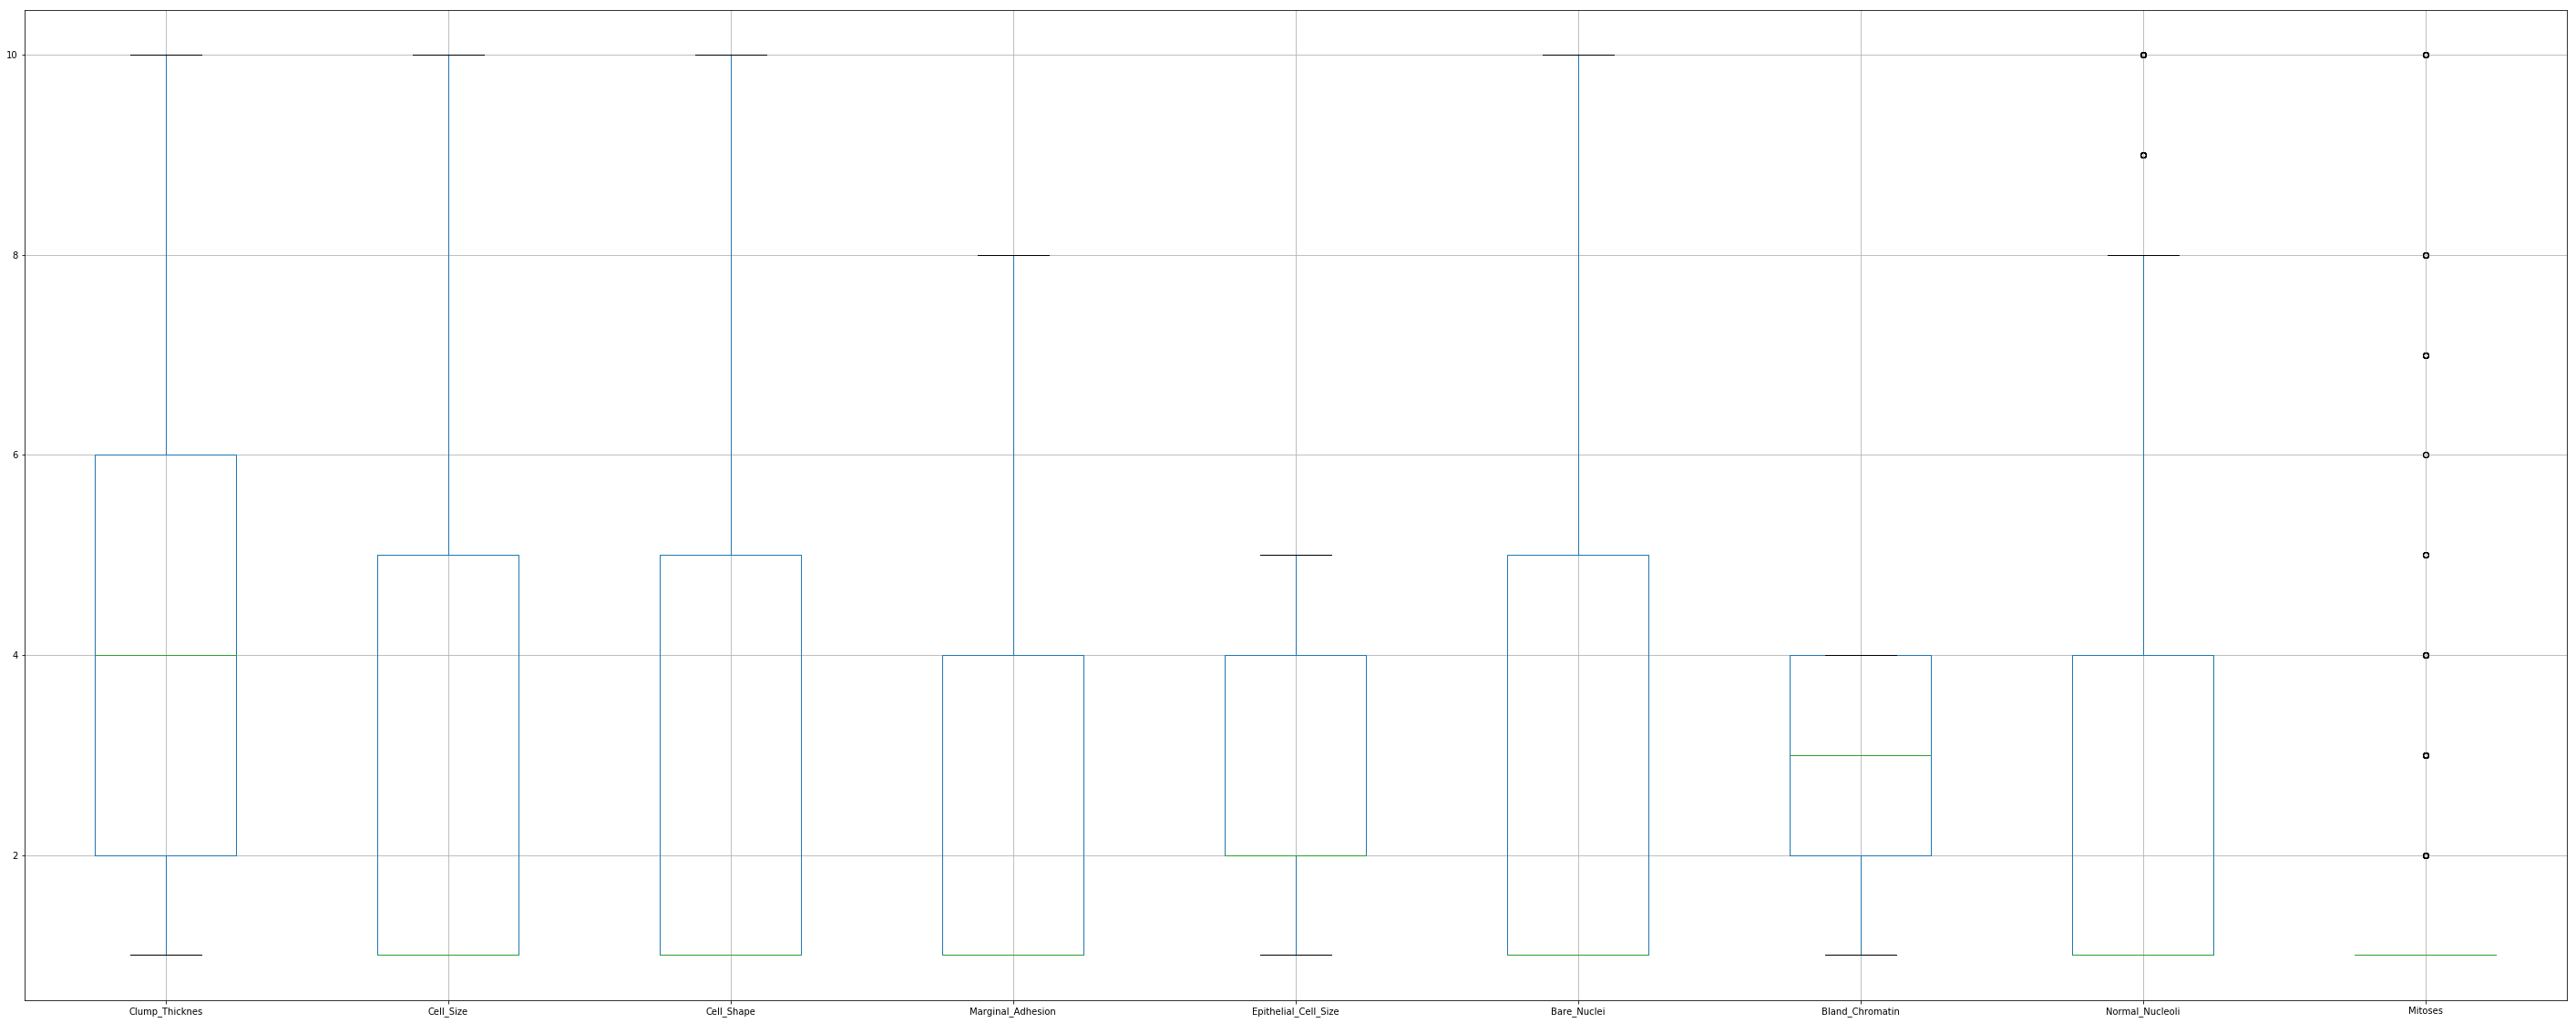

In [94]:
boxplot=df2.boxplot(column=['Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'],figsize=(50,20))

In [95]:
df2=df2.drop(columns=['Class','id_number'])

In [96]:
df2.head()

,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,5,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [97]:
from scipy.stats import zscore
df2 = df2.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [99]:
# PCA
# Step 1 - Create covariance matrix
cov_tav=df2.cov()

# Q7 Identify eigen values and eigen vector

In [102]:
# Step 2- Get eigen values and eigen vector
from scipy import linalg as la

In [104]:
w,v=la.eig(cov_tav)

In [105]:
w

array([5.91792949+0.j, 0.77706514+0.j, 0.09076794+0.j, 0.52884587+0.j,
       0.4455007 +0.j, 0.41193284+0.j, 0.25937911+0.j, 0.29930333+0.j,
       0.28233799+0.j])

In [106]:
v

array([[-0.30496959, -0.09225917,  0.00547729, -0.87292032,  0.05962112,
        -0.14625136, -0.18395795,  0.14368675,  0.23881239],
       [-0.37838803, -0.0065721 ,  0.72698431,  0.05120254,  0.19879132,
        -0.18075849,  0.23297529, -0.44541036, -0.02814116],
       [-0.37561758, -0.03408115, -0.67337098, -0.00180737,  0.19483543,
        -0.1963729 ,  0.39636639, -0.39889245, -0.10758019],
       [-0.33917302, -0.04142731, -0.06369038,  0.37519732, -0.38745271,
        -0.30395831, -0.14670914,  0.05825808,  0.68628574],
       [-0.35665213, -0.02918647, -0.07410383,  0.2003355 ,  0.16067504,
        -0.13818145, -0.77305996, -0.04412852, -0.42642949],
       [-0.33688912, -0.20910726,  0.08194967, -0.02390249, -0.59515714,
        -0.08105889,  0.29410186,  0.37292833, -0.49913805],
       [-0.32202098, -0.27103143, -0.02822135,  0.00379032, -0.12795413,
         0.8568956 , -0.07613357, -0.22092637,  0.12956286],
       [-0.33774136,  0.05617375,  0.02707167,  0.21770388,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [117]:
w/w.sum()*100 # Variance captured

array([65.65947534+0.j,  8.62154393+0.j,  1.00707101+0.j,  5.86754915+0.j,
        4.94283388+0.j,  4.57039814+0.j,  2.87781332+0.j,  3.32077291+0.j,
        3.13254232+0.j])

In [108]:
cum_sum=np.cumsum(w/w.sum())*100

In [109]:
cum_sum

array([ 65.65947534+0.j,  74.28101927+0.j,  75.28809028+0.j,
        81.15563944+0.j,  86.09847332+0.j,  90.66887146+0.j,
        93.54668477+0.j,  96.86745768+0.j, 100.        +0.j])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [110]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA()
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Q10 Find correlation between components and features

In [124]:
pca.explained_variance_

array([5.91792949, 0.77706514, 0.52884587, 0.4455007 , 0.41193284,
       0.29930333, 0.28233799, 0.25937911, 0.09076794])

In [125]:
pca.explained_variance_ratio_ 

array([0.65659475, 0.08621544, 0.05867549, 0.04942834, 0.04570398,
       0.03320773, 0.03132542, 0.02877813, 0.01007071])

In [126]:
np.cumsum(pca.explained_variance_ratio_ )

array([0.65659475, 0.74281019, 0.80148568, 0.85091402, 0.896618  ,
       0.92982573, 0.96115116, 0.98992929, 1.        ])

In [127]:
pca.components_

array([[ 0.30496959,  0.37838803,  0.37561758,  0.33917302,  0.35665213,
         0.33688912,  0.32202098,  0.33774136,  0.22187246],
       [-0.09225917, -0.0065721 , -0.03408115, -0.04142731, -0.02918647,
        -0.20910726, -0.27103143,  0.05617375,  0.93133028],
       [-0.87292032,  0.05120254, -0.00180737,  0.37519732,  0.2003355 ,
        -0.02390249,  0.00379032,  0.21770388, -0.08060473],
       [ 0.05962112,  0.19879132,  0.19483543, -0.38745271,  0.16067504,
        -0.59515714, -0.12795413,  0.57541502, -0.2033315 ],
       [ 0.14625136,  0.18075849,  0.1963729 ,  0.30395831,  0.13818145,
         0.08105889, -0.8568956 , -0.14881385, -0.18139364],
       [-0.14368675,  0.44541036,  0.39889245, -0.05825808,  0.04412852,
        -0.37292833,  0.22092637, -0.65431249,  0.02232421],
       [-0.23881239,  0.02814116,  0.10758019, -0.68628574,  0.42642949,
         0.49913805, -0.12956286, -0.09969292,  0.04369199],
       [ 0.18395795, -0.23297529, -0.39636639,  0.14670914,  0

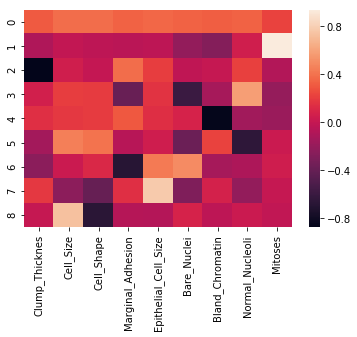

In [137]:
df_pca=pd.DataFrame(data=pca.components_,columns=['Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses' ])
sns.heatmap(df_pca)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [130]:
df_jokes=pd.read_csv("jokes.csv")

In [132]:
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [138]:
ratings=df_jokes.head(200)

In [139]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [141]:
ratings.shape

(200, 101)

# Q13 Change the column indices from 0 to 99

In [ ]:
# Already name the columns are presented as required

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [142]:
ratings.replace(to_replace =99, 
                 value =0) 

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()`

In [150]:
ratings_diff=ratings.apply(zscore)

In [151]:
ratings_diff

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,0.178514,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,1.371667,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,-0.968748,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,-1.014639,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,0.958652,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834
5,1.371667,-0.797374,-0.583525,-0.728955,-1.072902,-1.301062,-0.790424,-1.578608,-0.161811,-0.984348,...,-1.536632,-1.501198,-1.369490,-1.386409,-1.426499,-1.441815,-1.274105,-1.605313,-1.373243,-1.514384
6,-1.060529,1.538226,2.081847,1.356697,1.069553,1.591786,-0.914110,1.344707,1.830154,1.171165,...,0.700489,0.740224,0.773171,0.772626,0.740124,-1.320709,0.806302,0.707782,0.789401,0.708077
7,1.371667,-0.508450,-0.409369,-0.544217,-1.027262,-1.498469,-0.731825,1.620828,0.308342,-0.954561,...,-1.301662,-1.379062,-1.357023,-1.444006,-1.447485,-1.441815,-1.230163,-1.412056,-1.241052,-1.439543
8,1.371667,-0.744519,-0.583525,-0.937605,-1.040815,-1.605475,-0.700288,-0.972924,-1.823844,-1.009035,...,-1.364059,-1.361493,-1.265238,-1.329871,-1.386028,-1.376571,-1.281253,-1.417192,-1.338948,-1.546924
9,0.086733,-0.593506,-0.357642,-0.629285,-0.843509,1.189591,-0.578616,1.560259,0.537233,-0.787261,...,0.700489,-1.260736,0.773171,0.772626,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [153]:
ratings_diff.mean()

NumJokes    3.365364e-17
Joke1      -4.940492e-17
Joke2      -6.217249e-17
Joke3      -6.106227e-17
Joke4       2.536860e-16
Joke5      -8.881784e-18
Joke6      -8.881784e-18
Joke7      -1.665335e-18
Joke8       2.331468e-17
Joke9      -9.492407e-17
Joke10      9.992007e-18
Joke11     -2.386980e-17
Joke12      1.126876e-16
Joke13      6.661338e-17
Joke14     -1.221245e-17
Joke15     -2.164935e-17
Joke16     -1.065814e-16
Joke17      1.637579e-17
Joke18      2.331468e-17
Joke19     -9.159340e-18
Joke20      2.997602e-17
Joke21     -4.718448e-18
Joke22      9.020562e-17
Joke23      3.275158e-17
Joke24     -5.606626e-17
Joke25      4.996004e-18
Joke26      2.983724e-17
Joke27     -5.440093e-17
Joke28     -1.672273e-17
Joke29     -2.775558e-18
                ...     
Joke71      1.743050e-16
Joke72      1.443290e-17
Joke73      2.153833e-16
Joke74     -6.772360e-17
Joke75      2.997602e-17
Joke76      4.996004e-17
Joke77     -3.030909e-16
Joke78      7.327472e-17
Joke79      7.771561e-18


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [155]:
ratings_diff.mean().sort_values(ascending=False).head(10).index

Index(['Joke88', 'Joke85', 'Joke4', 'Joke96', 'Joke73', 'Joke71', 'Joke94',
       'Joke84', 'Joke97', 'Joke64'],
      dtype='object')